# Práctica 1 - Perceptrón

**Autores**: José Antonio Álvarez, Ivonne Aparicio, Sara Casado, Álvaro Madroñal y Javier Pardo

**Grupo**: 3ºC

En esta práctica se realiza el entrenamiento de un perceptrón para resolver las funciones lógicas AND y XOR usando la Ley de Hebb.

#### Importamos las librerías necesarias

In [689]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [690]:
np.random.seed(4)

## Función de activación y perceptrón

In [691]:
# Función de activación escalón
def activacion(x, umbral):     # si la entrada es mayor o igual al umbral, devuelve 1, sino 0
    return 1 if x >= umbral else 0

In [692]:
def perceptron(pesos, entrada, umbral=0):
    entrada_con_bias = np.insert(entrada, 0, 1)
    suma = np.dot(pesos, entrada_con_bias)
    return activacion(suma, umbral)

## Entrenamiento del perceptrón (Ley de Hebb)

In [693]:
def entrenar_perceptron(funcion, datosEntrada, yesperada, tasa_aprendizaje=0.4, epocas=10):
    # Paso 1: Pesos aleatorios (incluye bias)
    pesos = np.random.uniform(-1, 1, size=datosEntrada.shape[1] + 1)
    errores_totales = []  # Para graficar error por época
    resultados = []

    for epoca in range(epocas):
        print(f"\nÉpoca {epoca + 1}:")
        total_error = 0

        for j in range(len(datosEntrada)):
            # Paso 2: Introducir entrada
            entrada = datosEntrada[j]
            yd = yesperada[j]


            pesos_iniciales = pesos.copy()
            # Paso 3: Calcular salida real
            yr = perceptron(pesos, entrada)

            # Paso 4: Calcular error
            error = yd - yr
            total_error += abs(error)

            # Paso 5: Inicializar ∆Wi (solo a modo explicativo)
            delta_w = 0  # No se usa directamente porque la actualización es inmediata

            # Paso 6 y 7: Aplicar regla de Hebb con error y actualizar pesos
            pesos[1:] += tasa_aprendizaje * error * entrada      # W1, W2
            pesos[0]  += tasa_aprendizaje * error                # Bias

            # Mostrar resultados del paso
            print(f"Entrada: {entrada}, Pesos: {pesos}, Salida: {yr}, Esperada: {yd}, Error: {error}")

            resultados.append([
                funcion,
                epoca * len(datosEntrada) + j + 1,
                entrada[0], entrada[1],
                round(pesos_iniciales[1], 3), round(pesos_iniciales[2], 3),
                yr, yd, error,
                round(pesos[1], 3), round(pesos[2], 3)
            ])


        # Paso 8: Guardar error total de la época
        errores_totales.append(total_error)

    return pesos, errores_totales, resultados

# Entrenamiento AND
#pesos_finales, errores_totales = entrenar_perceptron(datosEntrada, yesperada, 0.8, 10)
#print("\nPesos finales:", pesos_finales)

In [694]:
# Generación de datos AND
datosEntrada = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
yesperada = np.array([0, 0, 0, 1])  # Salidas esperadas

#### Función para guardar los resultados en un CSV

In [695]:
def guardarCSV(resultados, nombre_archivo="L2P1-Perceptron.csv"):
    filas = []

    for fila in resultados:
        funcion, iteracion, x1, x2, w1_ini, w2_ini, yr, yd, error, w1_fin, w2_fin = fila
        filas.append({
            "Iteración": iteracion,
            "Entradas": f"[{int(x1)} {int(x2)}]",
            "Pesos iniciales": f"[{w1_ini} {w2_ini}]",
            "X1": int(x1),
            "X2": int(x2),
            "W1": w1_ini,
            "W2": w2_ini,
            "Yr": yr,
            "Yd": yd,
            "Error": error,
            "Pesos finales": f"[{w1_fin} {w2_fin}]",
            "W1": w1_fin,
            "W2": w2_fin
        })

    columnas = [
        "Iteración", "Entradas", "Pesos iniciales",
        "X1", "X2", "W1", "W2",
        "Yr", "Yd", "Error",
        "Pesos finales", "W1", "W2"
    ]

    df = pd.DataFrame(filas, columns=columnas)
    df.to_csv(nombre_archivo, index=False)
    print(f"\n Resultados guardados en {nombre_archivo}")

#### Entrenamiento para la función AND

In [696]:
# AND
datos_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
salidas_and = np.array([0, 0, 0, 1])
pesos_and, errores_and, resultados_and = entrenar_perceptron("AND", datos_and, salidas_and)


Época 1:
Entrada: [0 0], Pesos: [0.53405968 0.0944645  0.94536872], Salida: 1, Esperada: 0, Error: -1
Entrada: [0 1], Pesos: [0.13405968 0.0944645  0.54536872], Salida: 1, Esperada: 0, Error: -1
Entrada: [1 0], Pesos: [-0.26594032 -0.3055355   0.54536872], Salida: 1, Esperada: 0, Error: -1
Entrada: [1 1], Pesos: [0.13405968 0.0944645  0.94536872], Salida: 0, Esperada: 1, Error: 1

Época 2:
Entrada: [0 0], Pesos: [-0.26594032  0.0944645   0.94536872], Salida: 1, Esperada: 0, Error: -1
Entrada: [0 1], Pesos: [-0.66594032  0.0944645   0.54536872], Salida: 1, Esperada: 0, Error: -1
Entrada: [1 0], Pesos: [-0.66594032  0.0944645   0.54536872], Salida: 0, Esperada: 0, Error: 0
Entrada: [1 1], Pesos: [-0.26594032  0.4944645   0.94536872], Salida: 0, Esperada: 1, Error: 1

Época 3:
Entrada: [0 0], Pesos: [-0.26594032  0.4944645   0.94536872], Salida: 0, Esperada: 0, Error: 0
Entrada: [0 1], Pesos: [-0.66594032  0.4944645   0.54536872], Salida: 1, Esperada: 0, Error: -1
Entrada: [1 0], Pesos: 

#### Entrenamiento para la función XOR

In [697]:
# XOR
datos_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
salidas_xor = np.array([0, 1, 1, 0])
pesos_xor, errores_xor, resultados_xor = entrenar_perceptron("XOR", datos_xor, salidas_xor)



Época 1:
Entrada: [0 0], Pesos: [ 0.02963199  0.39545765 -0.56782101], Salida: 1, Esperada: 0, Error: -1
Entrada: [0 1], Pesos: [ 0.42963199  0.39545765 -0.16782101], Salida: 0, Esperada: 1, Error: 1
Entrada: [1 0], Pesos: [ 0.42963199  0.39545765 -0.16782101], Salida: 1, Esperada: 1, Error: 0
Entrada: [1 1], Pesos: [ 0.02963199 -0.00454235 -0.56782101], Salida: 1, Esperada: 0, Error: -1

Época 2:
Entrada: [0 0], Pesos: [-0.37036801 -0.00454235 -0.56782101], Salida: 1, Esperada: 0, Error: -1
Entrada: [0 1], Pesos: [ 0.02963199 -0.00454235 -0.16782101], Salida: 0, Esperada: 1, Error: 1
Entrada: [1 0], Pesos: [ 0.02963199 -0.00454235 -0.16782101], Salida: 1, Esperada: 1, Error: 0
Entrada: [1 1], Pesos: [ 0.02963199 -0.00454235 -0.16782101], Salida: 0, Esperada: 0, Error: 0

Época 3:
Entrada: [0 0], Pesos: [-0.37036801 -0.00454235 -0.16782101], Salida: 1, Esperada: 0, Error: -1
Entrada: [0 1], Pesos: [ 0.02963199 -0.00454235  0.23217899], Salida: 0, Esperada: 1, Error: 1
Entrada: [1 0], 

#### Guardamos los resultados finales en un único CSV

In [698]:
# CSV final
resultados_totales = resultados_and + resultados_xor
guardarCSV(resultados_totales)


 Resultados guardados en L2P1-Perceptron.csv


#### Gráfico de error total de AND y de XOR

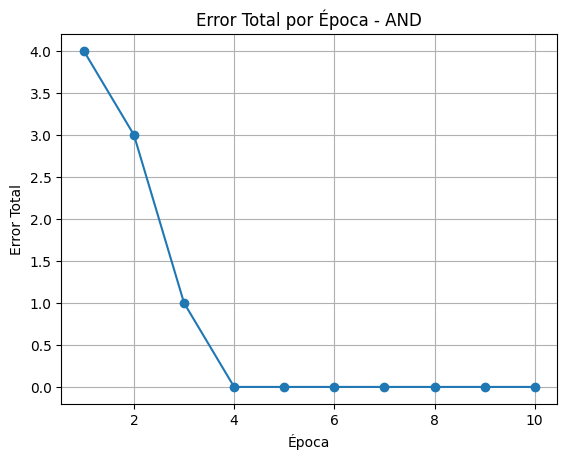


Resultados de la función AND:
Entrada: [0 0], Salida: 0
Entrada: [0 1], Salida: 0
Entrada: [1 0], Salida: 0
Entrada: [1 1], Salida: 1


In [699]:
# Graficar el error total por época
plt.plot(range(1, len(errores_and) + 1), errores_and, marker='o')
plt.title('Error Total por Época - AND')
plt.xlabel('Época')
plt.ylabel('Error Total')
plt.grid()
plt.show()

# Probar la red entrenada
print("\nResultados de la función AND:")
for entrada in datos_and:
    salida = perceptron(pesos_and, entrada)
    print(f"Entrada: {entrada}, Salida: {salida}")

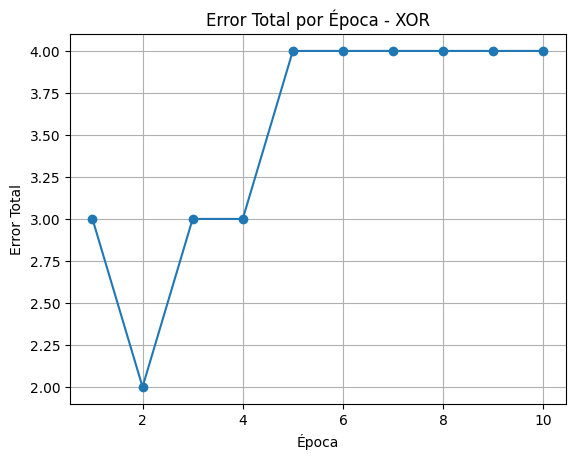


Resultados de la función XOR:
Entrada: [0 0], Salida: 1
Entrada: [0 1], Salida: 0
Entrada: [1 0], Salida: 0
Entrada: [1 1], Salida: 0


In [700]:
# Graficar el error total por época
plt.plot(range(1, len(errores_xor) + 1), errores_xor, marker='o')
plt.title('Error Total por Época - XOR')
plt.xlabel('Época')
plt.ylabel('Error Total')
plt.grid()
plt.show()

# Probar el perceptrón con los datos de entrada
print("\nResultados de la función XOR:")
for entrada in datosEntrada:
    salida = perceptron(pesos_xor, entrada)
    print(f'Entrada: {entrada}, Salida: {salida}')

#### Gráfica de clasificación del perceptrón para AND y para XOR

In [701]:
def graficar_clasificacion(pesos, datos, salidas, nombre_funcion, mostrar_hiperplano=True, mostrar_region=True):
    plt.figure(figsize=(8, 6))

    # Región de decisión
    if mostrar_region:
        xx, yy = np.meshgrid(np.linspace(-0.5, 2, 100), np.linspace(-0.5, 2, 100))
        Z = np.array([perceptron(pesos, np.array([x, y])) for x, y in zip(np.ravel(xx), np.ravel(yy))])
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, alpha=0.3, levels=[-0.1, 0.1, 1.1], colors=['red', 'blue'])

    # Hiperplano (opcional)
    if mostrar_hiperplano and pesos[2] != 0:
       x_values = np.linspace(-0.5, 2, 100)
       y_values = -(pesos[1] * x_values + pesos[0]) / pesos[2]
       plt.plot(x_values, y_values, color='green', label='Hiperplano de decisión', linewidth=2)

      # Agregar ecuación del hiperplano al gráfico
       eq = f"x₂ = {-pesos[1]/pesos[2]:.2f}·x₁ + {-pesos[0]/pesos[2]:.2f}"
       plt.text(-0.4, 1.85, f"Ecuación: {eq}", fontsize=10, color='green', bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

    # Puntos
    clase_0_plot = clase_1_plot = False
    for i, entrada in enumerate(datos):
        color = 'blue' if salidas[i] == 1 else 'red'
        label = ''
        if salidas[i] == 1 and not clase_1_plot:
            label = 'Clase 1'
            clase_1_plot = True
        elif salidas[i] == 0 and not clase_0_plot:
            label = 'Clase 0'
            clase_0_plot = True
        plt.scatter(entrada[0], entrada[1], color=color, edgecolor='k', label=label)

    plt.title(f'Clasificación del Perceptrón - Función {nombre_funcion}')
    plt.xlabel('Entrada 1')
    plt.ylabel('Entrada 2')
    plt.xlim(-0.5, 2)
    plt.ylim(-0.5, 2)
    plt.axhline(0, color='black', linewidth=0.5, ls='--')
    plt.axvline(0, color='black', linewidth=0.5, ls='--')
    plt.grid()
    plt.legend()
    plt.show()


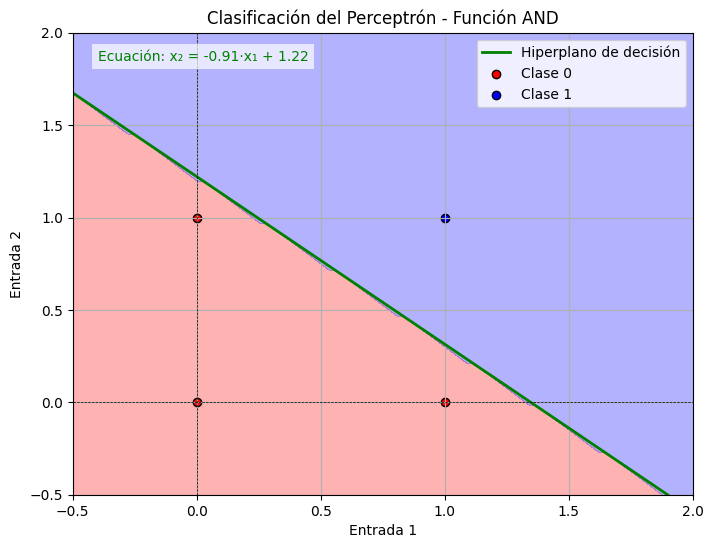

In [702]:
graficar_clasificacion(pesos_and, datos_and, salidas_and, "AND", mostrar_hiperplano=True, mostrar_region=True)

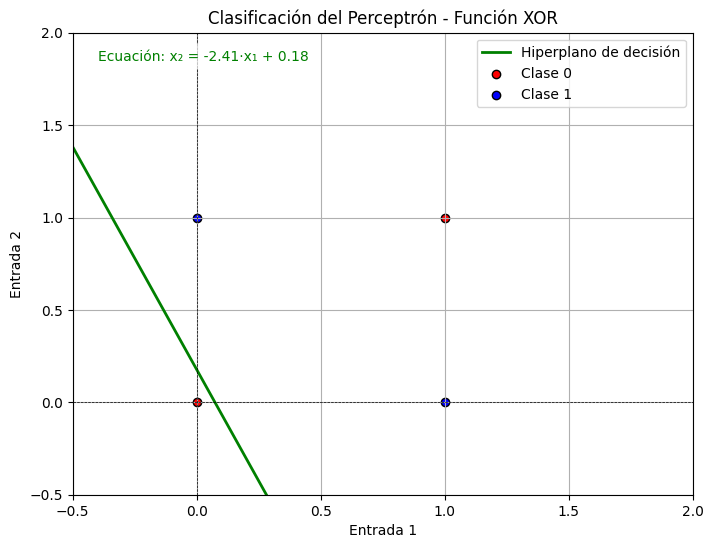

In [703]:
graficar_clasificacion(pesos_xor, datos_xor, salidas_xor, "XOR", mostrar_hiperplano=True, mostrar_region=False)

#### Pruebas para mejor learning rate

In [704]:
tasas_aprendizaje = [0.2, 0.4, 0.8]
resultados_por_tasa = {}

for tasa in tasas_aprendizaje:

    print(f"\nEntrenando con tasa de aprendizaje: {tasa}")
    np.random.seed(4)
    pesos_and, errores_and, resultados_and = entrenar_perceptron("AND", datos_and, salidas_and, tasa_aprendizaje=tasa)
    resultados_por_tasa[tasa] = errores_and
    print("Errores por época:", [int(e) for e in errores_and])



Entrenando con tasa de aprendizaje: 0.2

Época 1:
Entrada: [0 0], Pesos: [0.73405968 0.0944645  0.94536872], Salida: 1, Esperada: 0, Error: -1
Entrada: [0 1], Pesos: [0.53405968 0.0944645  0.74536872], Salida: 1, Esperada: 0, Error: -1
Entrada: [1 0], Pesos: [ 0.33405968 -0.1055355   0.74536872], Salida: 1, Esperada: 0, Error: -1
Entrada: [1 1], Pesos: [ 0.33405968 -0.1055355   0.74536872], Salida: 1, Esperada: 1, Error: 0

Época 2:
Entrada: [0 0], Pesos: [ 0.13405968 -0.1055355   0.74536872], Salida: 1, Esperada: 0, Error: -1
Entrada: [0 1], Pesos: [-0.06594032 -0.1055355   0.54536872], Salida: 1, Esperada: 0, Error: -1
Entrada: [1 0], Pesos: [-0.06594032 -0.1055355   0.54536872], Salida: 0, Esperada: 0, Error: 0
Entrada: [1 1], Pesos: [-0.06594032 -0.1055355   0.54536872], Salida: 1, Esperada: 1, Error: 0

Época 3:
Entrada: [0 0], Pesos: [-0.06594032 -0.1055355   0.54536872], Salida: 0, Esperada: 0, Error: 0
Entrada: [0 1], Pesos: [-0.26594032 -0.1055355   0.34536872], Salida: 1, Es

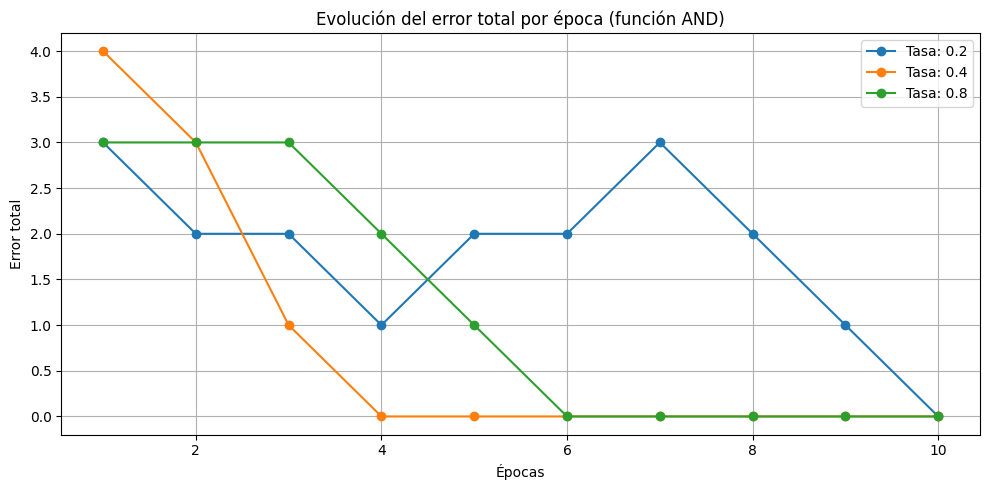

In [705]:
# Mostrar la evolución del error para cada tasa de aprendizaje
plt.figure(figsize=(10, 5))
for tasa, errores in resultados_por_tasa.items():
    plt.plot(range(1, len(errores)+1), errores, marker='o', label=f"Tasa: {tasa}")

plt.title("Evolución del error total por época (función AND)")
plt.xlabel("Épocas")
plt.ylabel("Error total")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()